<a href="https://colab.research.google.com/github/asd3656/AI_12_cp2/blob/main/CP2_%EC%86%A1%EB%82%98%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/CP2_project/2019-Oct.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [6]:
df[df['category_code'] == 'computers.notebook']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
18,2019-10-01 00:00:19 UTC,view,1306631,2053013558920217191,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
64,2019-10-01 00:00:50 UTC,view,1307135,2053013558920217191,computers.notebook,hp,320.35,542378517,244570b9-ebb4-4d4a-b63a-653225d975d5
77,2019-10-01 00:01:05 UTC,view,1306083,2053013558920217191,computers.notebook,hp,1512.78,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
78,2019-10-01 00:01:06 UTC,view,1307004,2053013558920217191,computers.notebook,lenovo,290.61,542378517,244570b9-ebb4-4d4a-b63a-653225d975d5
...,...,...,...,...,...,...,...,...,...
42448683,2019-10-31 23:59:26 UTC,view,1306686,2053013558920217191,computers.notebook,prestigio,257.38,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
42448688,2019-10-31 23:59:27 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726
42448703,2019-10-31 23:59:34 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
42448729,2019-10-31 23:59:47 UTC,view,1307489,2053013558920217191,computers.notebook,xiaomi,715.33,530857208,c69f9c63-7098-426c-97d9-8cb94a0a1083


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


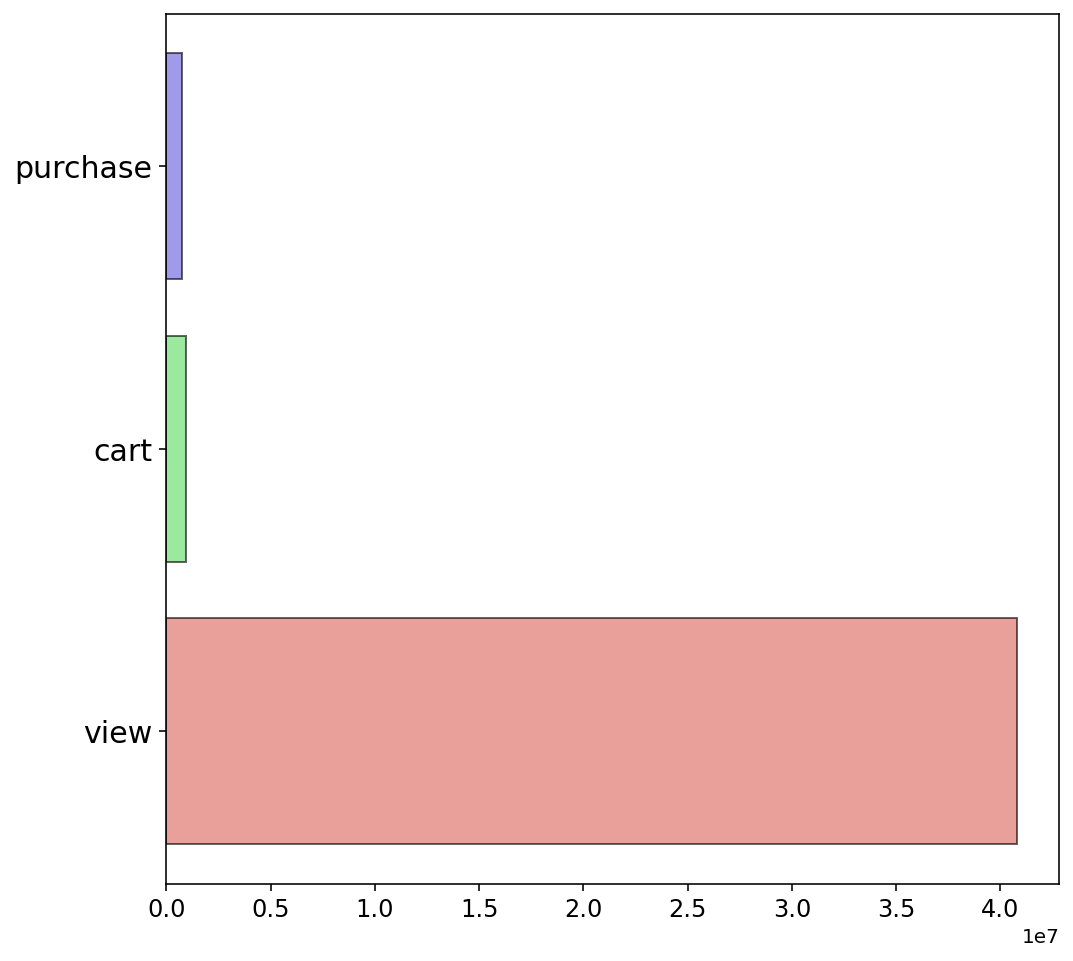

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
nation_data = Counter(df['event_type']).most_common() ## 데이터 개수가 많은 순으로 출력
nation_data = nation_data[:3] ## 상위 3개만 저장
 
data = [x[1] for x in nation_data] ## 데이터 개수
nations = [x[0] for x in nation_data] ## event_type
 
## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정
 
plt.barh(nations, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

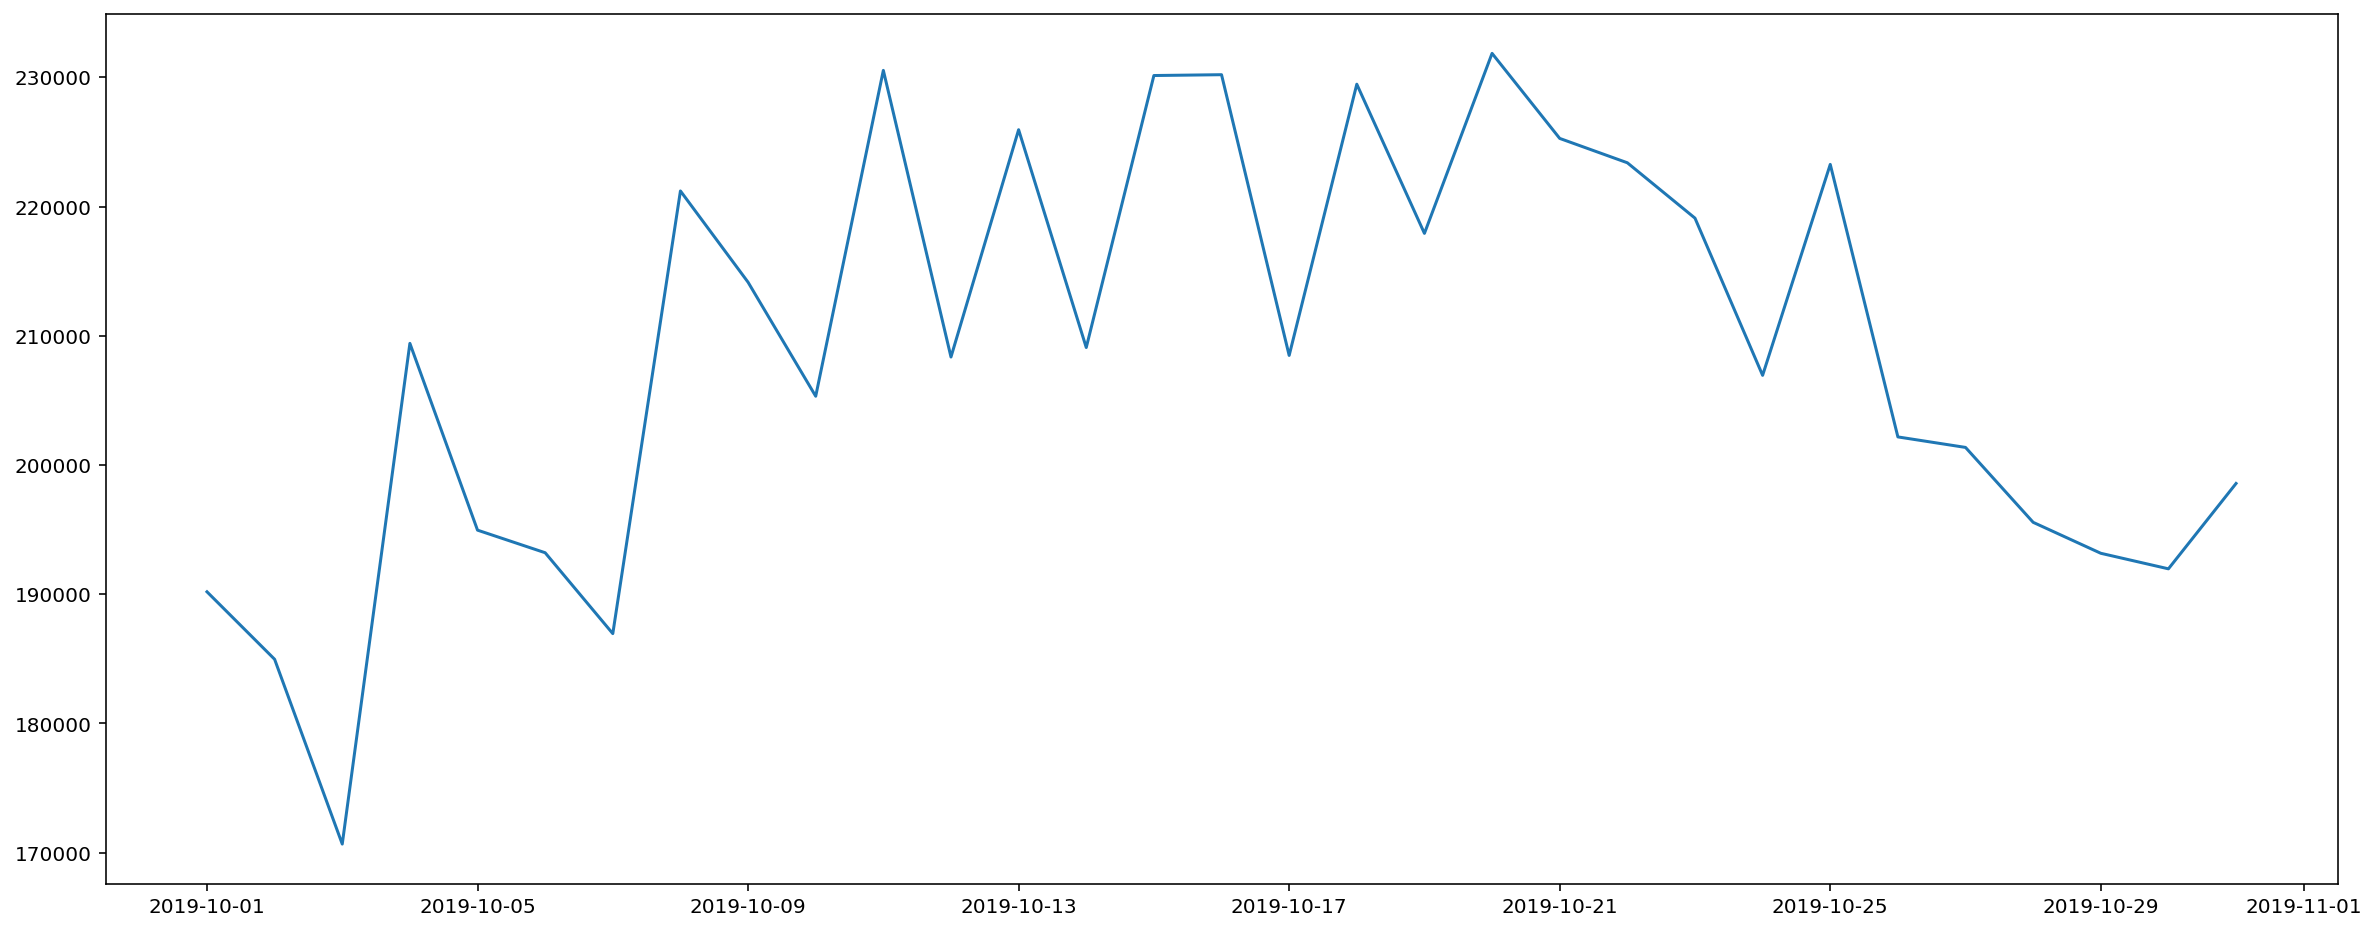

In [8]:
from datetime import datetime

# 날짜별 방문자 수
data = df.loc[:,['event_time','user_id']]

#날짜만 추출
data['event_time'] = data['event_time'].apply(lambda x: str(x)[0:10])
visitor_by_date = data.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

In [9]:
data.head()

,event_time,user_id
0,2019-10-01,541312140
1,2019-10-01,554748717
2,2019-10-01,519107250
3,2019-10-01,550050854
4,2019-10-01,535871217


In [10]:
data.duplicated().sum()

35975041

In [11]:
df['brand'].value_counts()

samsung         5282775
apple           4122554
xiaomi          3083763
huawei          1111205
lucente          655861
                 ...   
nec                   1
neocoregames          1
incase                1
portdesigns           1
skindoctors           1
Name: brand, Length: 3444, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


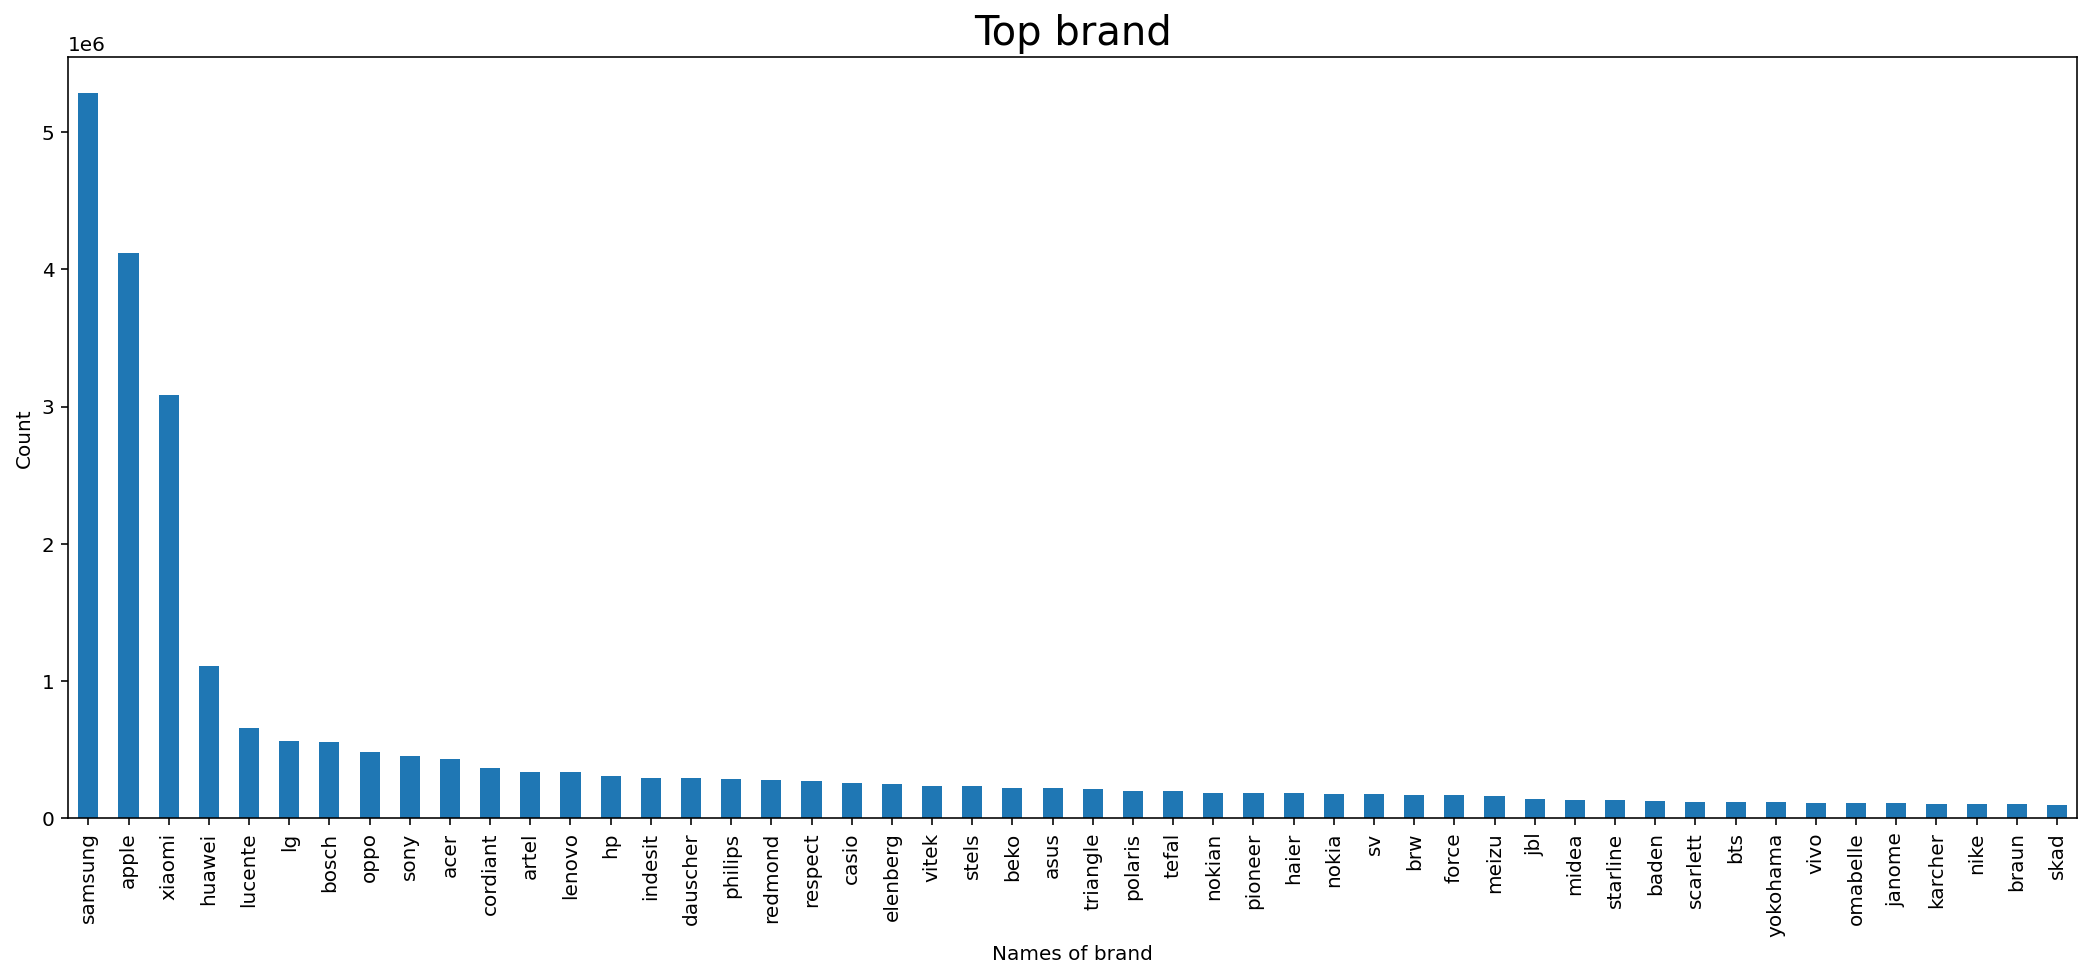

In [12]:
#모든 event type의 브랜드별 판매순위
df['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

In [13]:
purchase_df = df.loc[df['event_type'].isin(['purchase'])]
purchase_df.duplicated().sum()

76

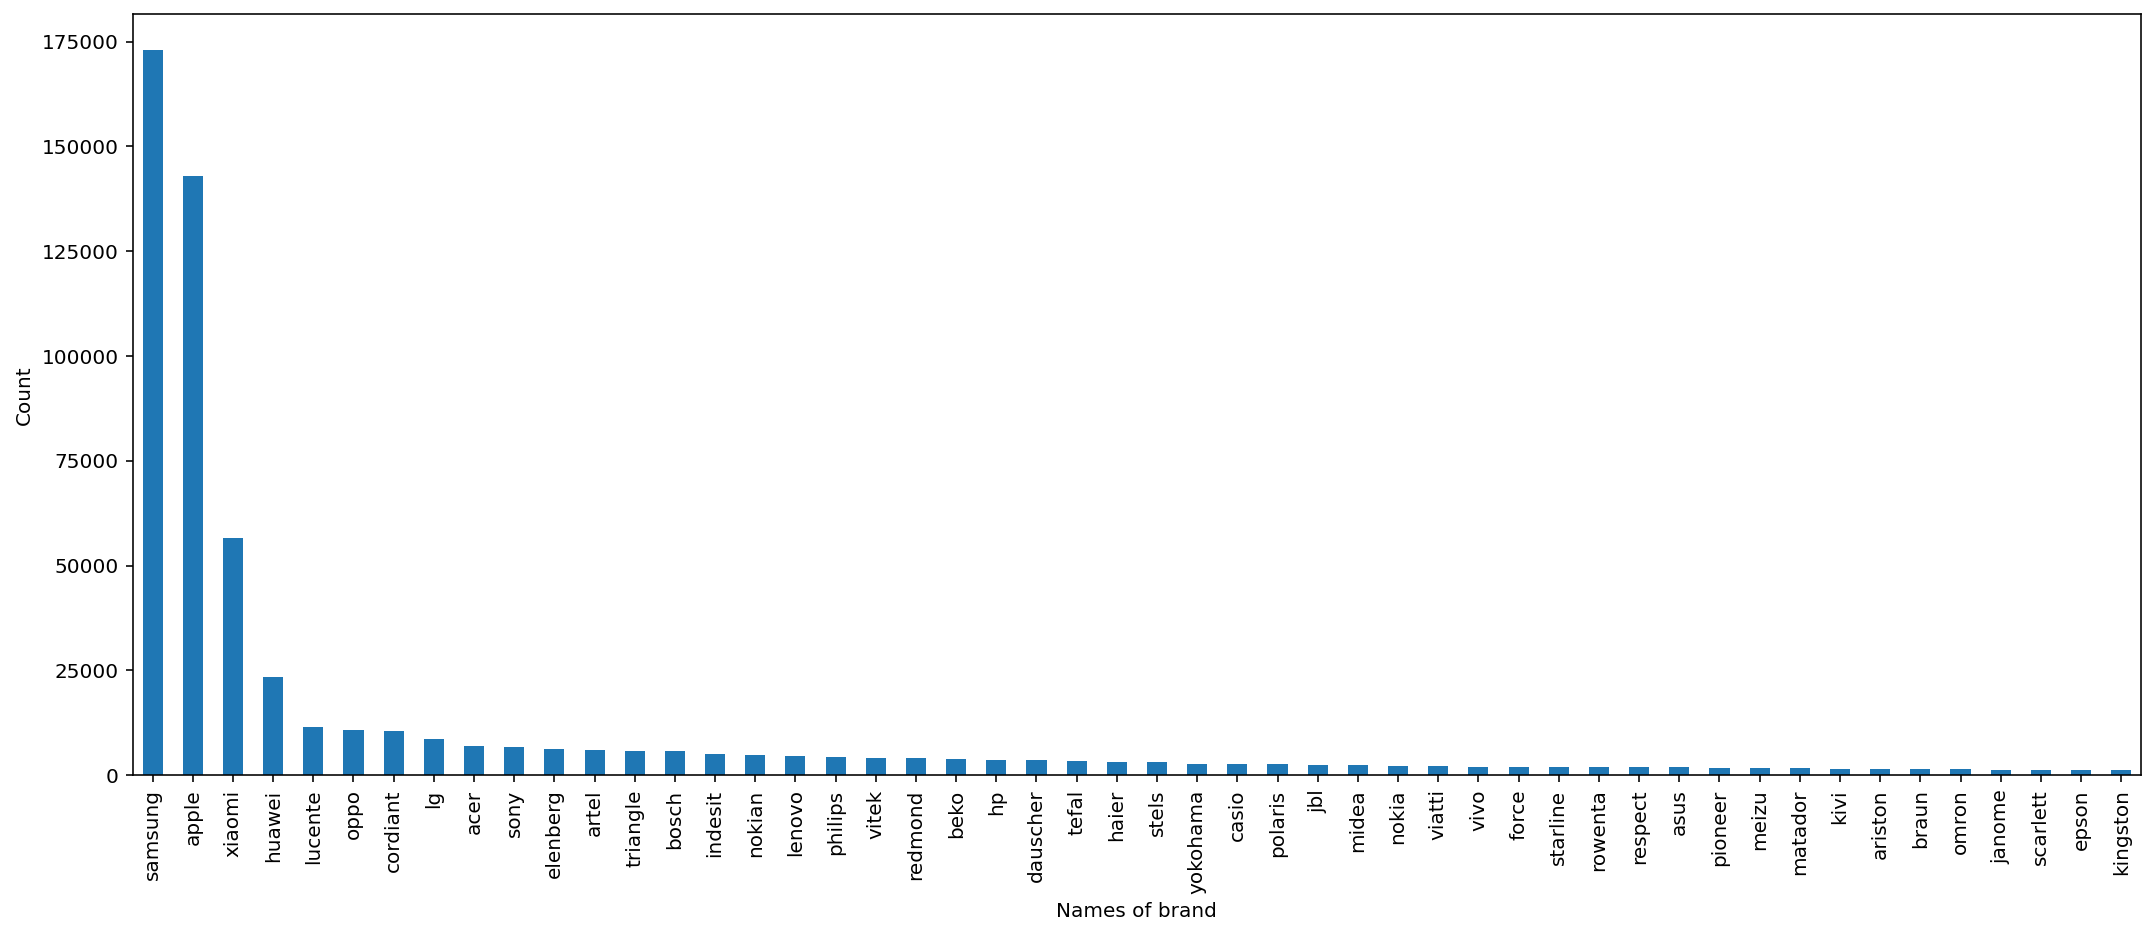

In [14]:
# event_type => purchase인 것 중에서 브랜드별 판매순위
purchase_df = purchase_df.drop_duplicates()
purchase_df['brand'].value_counts().head(50).plot.bar(figsize =(18,7))
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

In [15]:
# total => event_time, event_type의 중복 개수
day =['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
event_type_df = df.groupby(['event_time','event_type']).size().reset_index(name = 'total')
event_type_df

,event_time,event_type,total
0,2019-10-01 00:00:00 UTC,view,2
1,2019-10-01 00:00:01 UTC,view,2
2,2019-10-01 00:00:04 UTC,view,1
3,2019-10-01 00:00:05 UTC,view,1
4,2019-10-01 00:00:08 UTC,view,2
...,...,...,...
3943185,2019-10-31 23:59:55 UTC,view,3
3943186,2019-10-31 23:59:56 UTC,view,2
3943187,2019-10-31 23:59:57 UTC,view,2
3943188,2019-10-31 23:59:58 UTC,view,7


In [16]:
purchases = event_type_df.loc[event_type_df.event_type == 'purchase'] 
cart = event_type_df.loc[event_type_df.event_type == 'cart']
view = event_type_df.loc[event_type_df.event_type == 'view']

In [17]:
view.head()

,event_time,event_type,total
0,2019-10-01 00:00:00 UTC,view,2
1,2019-10-01 00:00:01 UTC,view,2
2,2019-10-01 00:00:04 UTC,view,1
3,2019-10-01 00:00:05 UTC,view,1
4,2019-10-01 00:00:08 UTC,view,2


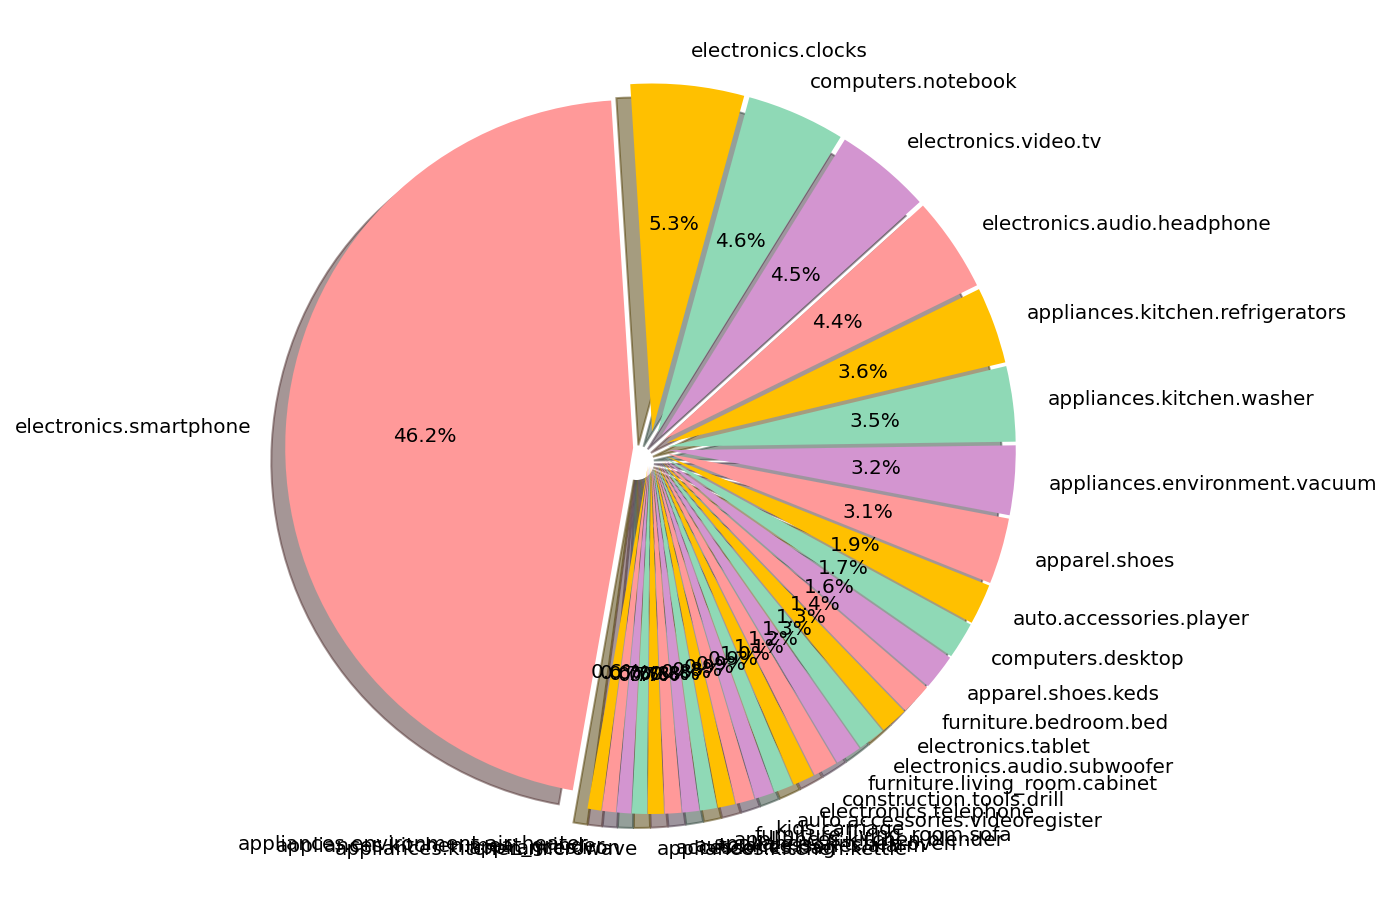

In [18]:
#상위 30개의 category_code
top_category_code = df.loc[:,'category_code'].value_counts()[:30].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

In [19]:
df['category_code'].unique()

array([nan, 'appliances.environment.water_heater',
       'furniture.living_room.sofa', 'computers.notebook',
       'electronics.smartphone', 'computers.desktop',
       'apparel.shoes.keds', 'appliances.kitchen.microwave',
       'furniture.bedroom.bed', 'electronics.video.tv',
       'appliances.kitchen.mixer', 'electronics.audio.headphone',
       'appliances.environment.air_heater', 'apparel.shoes',
       'appliances.environment.vacuum',
       'appliances.kitchen.refrigerators', 'appliances.kitchen.washer',
       'computers.peripherals.monitor', 'construction.tools.pump',
       'electronics.clocks', 'apparel.shoes.slipons',
       'furniture.living_room.chair', 'auto.accessories.compressor',
       'appliances.kitchen.meat_grinder',
       'computers.components.videocards', 'furniture.kitchen.table',
       'construction.tools.drill', 'kids.toys', 'electronics.telephone',
       'furniture.bathroom.toilet', 'auto.accessories.alarm',
       'apparel.sock', 'auto.accessories.pla

In [20]:
# RFM

# df['event_time']=pd.to_datetime(df['event_time'])

In [21]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [22]:
purchases_df = df.loc[df.event_type == 'purchase'] 

In [43]:
purchases_df['event_time'] = pd.to_datetime(purchases_df['event_time']).dt.tz_convert(None)

In [44]:
from tqdm import tqdm
 
user_id = list(purchases_df['user_id'].unique()) ## 고객아이디
 
## 먼저 각 고객별로 구매금액이 얼마인지 알아보자.
monetary_df = pd.DataFrame() ## 구매금액 데이터 초기화
monetary_df['user_id'] = user_id ## 고객아이디 삽입
 
monetary_data = [] ## 구매금액을 담을 리스트
for i in tqdm(user_id,position=0,desc='Calculating amount of individual customer'):
    temp = purchases_df.query('user_id==@i') ## 해당 아이디의 고객데이터 추출
    amount = sum(temp['price']) ## 해당 고객 구매금액
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data ## 구매금액 데이터 삽입

Calculating amount of individual customer: 100%|██████████| 347118/347118 [44:14<00:00, 130.77it/s]


In [45]:
monetary_df

,user_id,Monetary
0,543272936,4432.08
1,551377651,4833.17
2,514591159,29.51
3,555332717,244.75
4,524601178,189.91
...,...,...
347113,555466772,531.26
347114,514503441,787.50
347115,514905226,29.58
347116,544501248,1088.95


In [46]:
temp_recency_df = purchases_df[['user_id','event_time']].drop_duplicates() ## 고객 아이디와 event_time 추출한뒤 중복 제거
recency_df = temp_recency_df.groupby('user_id')['event_time'].max().reset_index() ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 event_time에 max를 적용한다.
recency_df = recency_df.rename(columns={'event_time':'Recency'})

In [47]:
## 각 고객별 방문횟수를 알아보자.
temp_frequency_df = df[['user_id','event_type']].drop_duplicates() ## 고객 아이디와 event_type만 추출한뒤 중복 제거
frequency_df = temp_frequency_df.groupby('user_id')['event_type'].count().reset_index() ## 아이디로 그룹화 한다음 방문횟수를 구해야 한다. 여기서는 방문횟수를 event_type으로 생각했으므로 count를 적용한다.
frequency_df = frequency_df.rename(columns={'event_type':'Frequency'})
 
## 데이터를 고객아이디를 기준으로 합쳐야한다.
rfm_df = pd.merge(recency_df,frequency_df,how='left',on='user_id')
rfm_df = pd.merge(rfm_df,monetary_df,how='left',on='user_id')

In [48]:
rfm_df

,user_id,Recency,Frequency,Monetary
0,264649825,2019-10-06 20:36:11,2,1240.04
1,303160429,2019-10-13 13:25:29,2,340.59
2,340041246,2019-10-14 14:45:39,3,915.52
3,371877401,2019-10-09 15:51:08,2,29.89
4,384989212,2019-10-18 11:19:59,2,41.44
...,...,...,...,...
347113,566270177,2019-10-31 22:31:17,2,75.94
347114,566272569,2019-10-31 23:24:12,3,254.84
347115,566274637,2019-10-31 23:05:38,2,2011.63
347116,566276996,2019-10-31 23:34:56,2,74.39


In [50]:
## 데이터 변환
current_day = pd.to_datetime('20191001') # 기준 날짜를 2019년 10월 1일 0시 0분으로 잡았다.
time_diff = rfm_df['Recency']- current_day # 최근방문일과 기준 날짜의 시간 차이 => 클수록 방문한지 오래됨
time_in_seconds = [x.total_seconds() for x in time_diff] # 시간 차이를 초단위로 계산
rfm_df['Recency'] = time_in_seconds # 변환된 데이터를 다시 삽입한다.

In [51]:
rfm_df

,user_id,Recency,Frequency,Monetary
0,264649825,506171.0,2,1240.04
1,303160429,1085129.0,2,340.59
2,340041246,1176339.0,3,915.52
3,371877401,748268.0,2,29.89
4,384989212,1509599.0,2,41.44
...,...,...,...,...
347113,566270177,2673077.0,2,75.94
347114,566272569,2676252.0,3,254.84
347115,566274637,2675138.0,2,2011.63
347116,566276996,2676896.0,2,74.39


In [52]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64